# Preprocesamiento de datos sobre desastres naturales en los años 2016-2017-2018

**1. Importamos la base de datos**


In [68]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2016-2017-2018.xlsx')

df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2016-0001-POL,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,POL,...,NaN,NaN,NaN,NaN,NaN,NaN,78.767923,"[{""adm1_code"":2370,""adm1_name"":""Dolnoslaskie""}...",2016-01-12,2023-09-25
1,2016-0001-UKR,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,UKR,...,NaN,NaN,NaN,NaN,NaN,NaN,78.767923,"[{""adm1_code"":3148,""adm1_name"":""Cherkas'ka""},{...",2017-03-31,2023-09-25
2,2016-0002-BGD,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,78.767923,"[{""adm2_code"":5778,""adm2_name"":""Dhaka""},{""adm2...",2016-01-12,2023-09-25
3,2016-0002-IND,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,75000.0,95216.0,78.767923,"[{""adm2_code"":17583,""adm2_name"":""Kamrup""},{""ad...",2016-01-12,2023-09-25
4,2016-0004-TON,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Cyclone Ulla,TON,...,NaN,NaN,NaN,NaN,NaN,NaN,78.767923,"[{""adm1_code"":2976,""adm1_name"":""Administrative...",2016-01-12,2023-09-25


**2. Apartamos las columnas que necesitamos.**

In [69]:
# Mantener solo las variables mencionadas a continuacion.

columns_to_keep = ['Start Year', 'Start Month', 'Start Day',
    'Country', 'Region', 'Location', 'Magnitude',
    "Disaster Subgroup", 'Total Deaths', 'No. Injured',
    'No. Affected', 'Total Affected', 'Total Damage (\'000 US$)' ]
df = df[columns_to_keep]

# Mostramos los primeros 5 elementos para identificar que se realizo el primer Filtro
df.head()

,Start Year,Start Month,Start Day,Country,Region,Location,Magnitude,Disaster Subgroup,Total Deaths,No. Injured,No. Affected,Total Affected,Total Damage ('000 US$)
0,2016,1.0,2.0,Poland,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-20.0,Meteorological,21.0,NaN,NaN,NaN,NaN
1,2016,1.0,1.0,Ukraine,Europe,"Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnip...",NaN,Meteorological,37.0,NaN,NaN,NaN,NaN
2,2016,1.0,3.0,Bangladesh,Asia,"Dhaka, Jamalpur districts (Dhaka province), Ra...",6.7,Geophysical,5.0,70.0,NaN,70.0,NaN
3,2016,1.0,3.0,India,Asia,"Guwahati city (Kamrup district, Assam province...",6.7,Geophysical,8.0,308.0,10500.0,10808.0,75000.0
4,2016,1.0,2.0,Tonga,Oceania,"Vava'u, Ha'apai islands (Administrative unit n...",150.0,Meteorological,NaN,NaN,392.0,392.0,NaN


**3. Filtramos los desastres hidrologicos**

In [70]:
df = df[df["Disaster Subgroup"] == "Hydrological"]

df.head()

,Start Year,Start Month,Start Day,Country,Region,Location,Magnitude,Disaster Subgroup,Total Deaths,No. Injured,No. Affected,Total Affected,Total Damage ('000 US$)
14,2016,1.0,17.0,United Republic of Tanzania,Africa,"Dodoma, Mwanza, Rufiji provinces",182022.09,Hydrological,3.0,NaN,58896.0,58896.0,NaN
15,2016,1.0,1.0,Ecuador,Americas,"Guayas, Bolívar, Esmeraldas, Cotopaxi, Los Río...",69541.98,Hydrological,9.0,NaN,10000.0,10000.0,10000.0
16,2016,1.0,9.0,Brazil,Americas,"Arapongas, Rolândia, Londrina districts (Paran...",110514.83,Hydrological,3.0,NaN,50500.0,50500.0,100000.0
18,2016,1.0,26.0,China,Asia,"Guangdong Sheng, Fujian Sheng, Guangxi Zhuangz...",NaN,Hydrological,11.0,NaN,NaN,3000.0,20000.0
19,2016,1.0,24.0,Ecuador,Americas,"Atacames, Rioverde, Esmeraldas districts (Esme...",NaN,Hydrological,NaN,NaN,23955.0,23955.0,NaN


**4. Hacemos limpieza de los datos nulos eliminando las filas que contengan datos NaN en las columnas indicadas.**

In [76]:
df = df.dropna(subset=['Magnitude'])

df = df.dropna(subset=['Total Deaths'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 1 to 97
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Start Year               97 non-null     int64  
 1   Start Month              97 non-null     float64
 2   Start Day                97 non-null     float64
 3   Country                  97 non-null     object 
 4   Region                   97 non-null     object 
 5   Location                 95 non-null     object 
 6   Magnitude                97 non-null     float64
 7   Disaster Subgroup        97 non-null     object 
 8   Total Deaths             97 non-null     float64
 9   No. Injured              19 non-null     float64
 10  No. Affected             88 non-null     float64
 11  Total Affected           92 non-null     float64
 12  Total Damage ('000 US$)  41 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 10.6+ KB


**5. Con la siguiente funcion determinamos la limpieza que se realizo.**

In [72]:
df.isnull().sum()

,0
Start Year,0
Start Month,0
Start Day,0
Country,0
Region,0
Location,2
Magnitude,0
Disaster Subgroup,0
Total Deaths,0
No. Injured,78


**6. Para finalizar ajustamos el indice de manera organizada para tener coherencia en la data.**

In [73]:
indices = list(range(1,98))
df.index = indices
df.head()

,Start Year,Start Month,Start Day,Country,Region,Location,Magnitude,Disaster Subgroup,Total Deaths,No. Injured,No. Affected,Total Affected,Total Damage ('000 US$)
1,2016,1.0,17.0,United Republic of Tanzania,Africa,"Dodoma, Mwanza, Rufiji provinces",182022.09,Hydrological,3.0,NaN,58896.0,58896.0,NaN
2,2016,1.0,1.0,Ecuador,Americas,"Guayas, Bolívar, Esmeraldas, Cotopaxi, Los Río...",69541.98,Hydrological,9.0,NaN,10000.0,10000.0,10000.0
3,2016,1.0,9.0,Brazil,Americas,"Arapongas, Rolândia, Londrina districts (Paran...",110514.83,Hydrological,3.0,NaN,50500.0,50500.0,100000.0
4,2016,2.0,7.0,Indonesia,Asia,"Dharmasraya, Kota Payakumbuh, Kota Solok, Lima...",235818.78,Hydrological,8.0,NaN,80313.0,80313.0,2000.0
5,2016,3.0,19.0,China,Asia,"Jiangxi Sheng, Hunan Sheng, Guangdong Sheng, G...",383223.81,Hydrological,5.0,NaN,216000.0,219300.0,170000.0


**7.Guardamos el archivo de la data**

In [67]:
df.to_excel("/content/drive/MyDrive/Colab Notebooks/BD_Limpia.xlsx")

# Analisis de los datos:

Importamos las librerias.

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

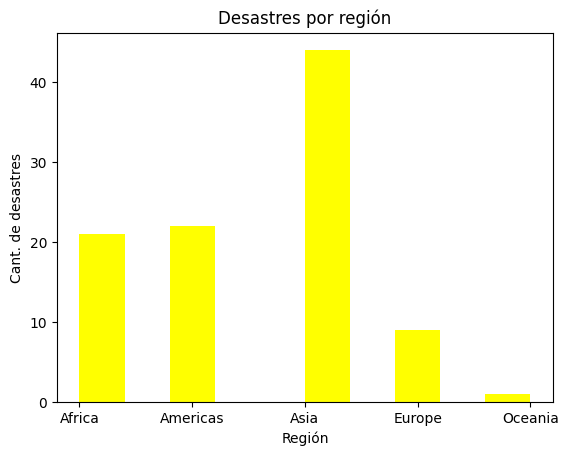

In [130]:
# Gráfica de desastres hidrologicos por región
region = df["Region"]
plt.hist(region, color="yellow")
plt.title("Desastres por región")
plt.ylabel("Cant. de desastres")
plt.xlabel("Región")
plt.show()

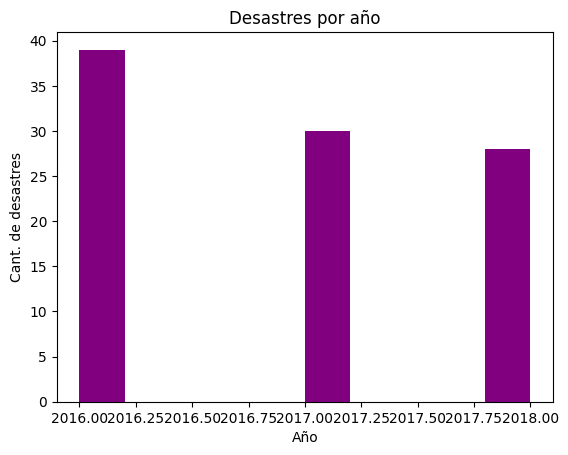

In [142]:
# Gráfica de desastres hidrologicos por años
año = df["Start Year"]
plt.hist(año, color="Purple")
plt.title("Desastres por año")
plt.ylabel("Cant. de desastres")
plt.xlabel("Año")
plt.show()

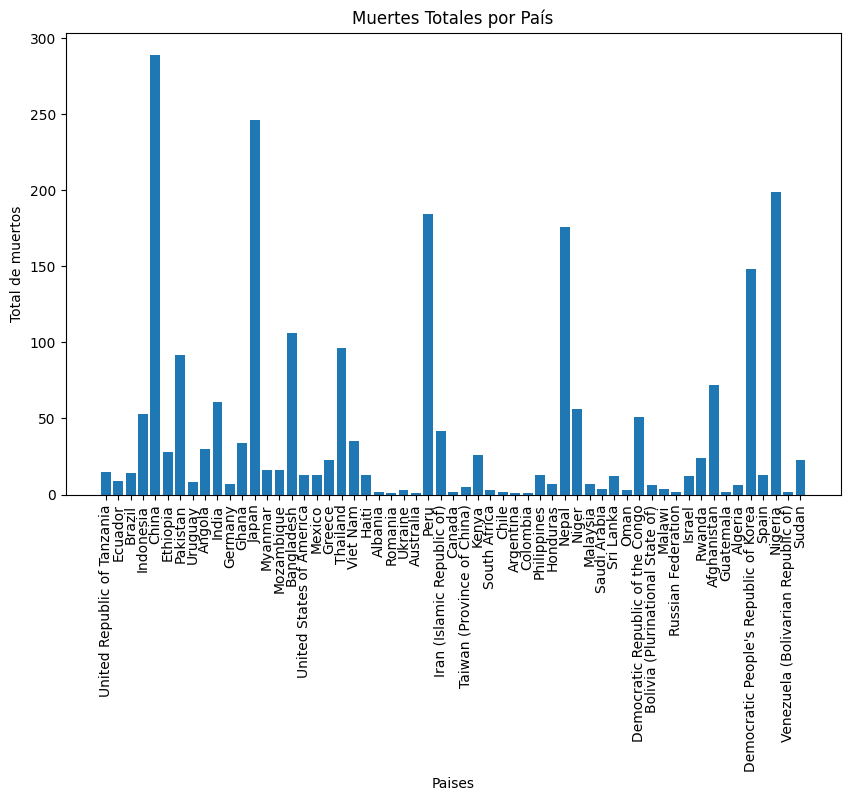

In [121]:
# Gráfica de muertes totales por país (No se como hacer que se vea mejor.)
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['Total Deaths'])
plt.title('Muertes Totales por País')
plt.xlabel('Paises')
plt.ylabel('Total de muertos')
plt.xticks(rotation=90)
plt.show()

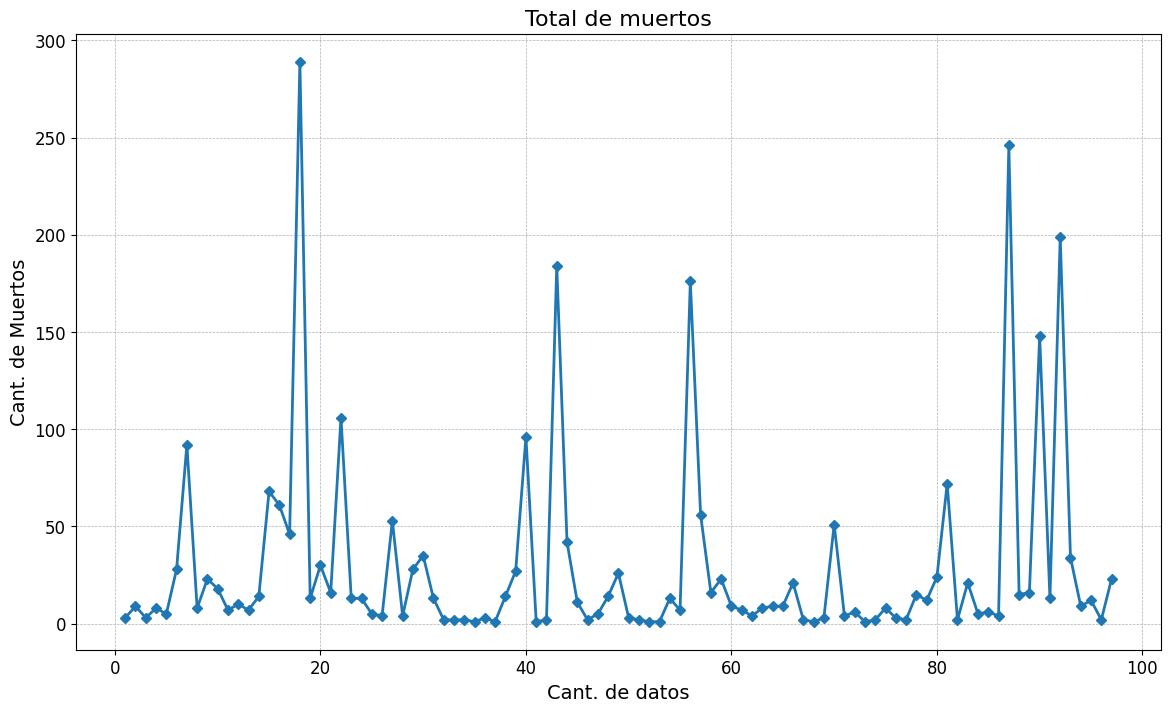

In [101]:
# Gráfica de total de muertos

total_deaths = df['Total Deaths']

plt.figure(figsize=(14,8))
plt.plot(total_deaths, marker='D',linewidth=2, markersize=5)
plt.title('Total de muertos', fontsize=16)
plt.xlabel('Cant. de datos', fontsize=14)
plt.ylabel('Cant. de Muertos', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

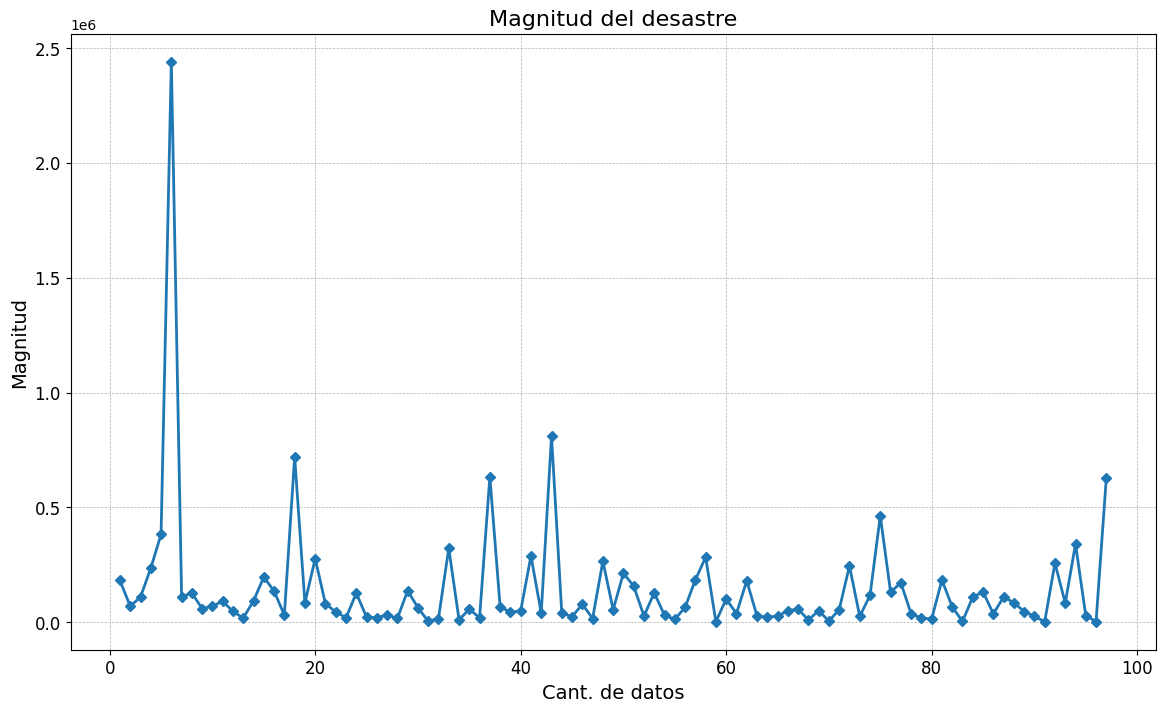

In [103]:
# Gráfica de magnitud del desastres

magnitud = df['Magnitude']
plt.figure(figsize=(14,8))
plt.plot(magnitud, marker='D',linewidth=2, markersize=5)
plt.title('Magnitud del desastre', fontsize=16)
plt.xlabel('Cant. de datos', fontsize=14)
plt.ylabel('Magnitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()